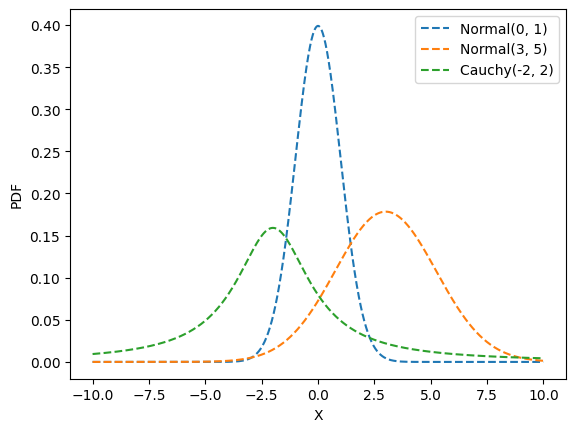

In [1]:
# Question 1.a
%matplotlib inline
import numpy as np
from scipy.stats import cauchy
from scipy.stats import norm
import matplotlib.pyplot as plt


# draw a thousand samples
sample_data = np.linspace(-10, 10, 1000)

# normal distribution with mean = 0 and variance = 1
pdf1 = norm.pdf(sample_data, 0, np.sqrt(1))
plt.plot(sample_data, pdf1, label='Normal(0, 1)', ls="--")

# normal distribution with mean = 3 and variance = 5
pdf2 = norm.pdf(sample_data, 3, np.sqrt(5))
plt.plot(sample_data, pdf2, label='Normal(3, 5)', ls="--")

# cauchy distribution with location = -2 and scale = 2
pdf3 = cauchy.pdf(sample_data, -2, 2)
plt.plot(sample_data, pdf3, label='Cauchy(-2, 2)', ls="--")

plt.xlabel("X")
plt.ylabel("PDF")
plt.legend(loc='upper right')
plt.show()



In [2]:
# Question 1.b
def normal_qq_plot(data: np.array):
    """
    This function plots the normal QQ plot of the given data
    :param data: 1D numpy array of data
    :return: None
    """
    # sort the data
    sorted_data = np.sort(data)

    # normalize the data
    sorted_data = (sorted_data - np.mean(sorted_data)) / np.std(sorted_data)

    # calculate the quantiles
    quantiles = np.arange(1, len(data) + 1) / len(data)

    # calculate the z values from normal distribution for these quantiles
    theoretical_quantiles = norm.ppf(quantiles)

    # plot the quantiles of the sample against the quantiles of the normal distribution
    fig = plt.figure()
    plt.plot(theoretical_quantiles, theoretical_quantiles, label="Normal distribution", color="red")

    plt.scatter(theoretical_quantiles, sorted_data, label="Sample Quantiles")
    plt.xlabel("Theoretical Quantiles")
    plt.ylabel("Sample Quantiles")
    plt.title("Normal QQ Plot")

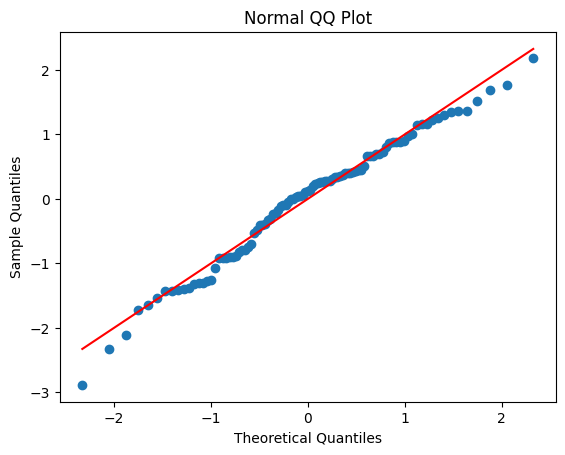

In [4]:
# Question 1.c
data = np.random.normal(loc=0, scale=1, size=100)
normal_qq_plot(data)

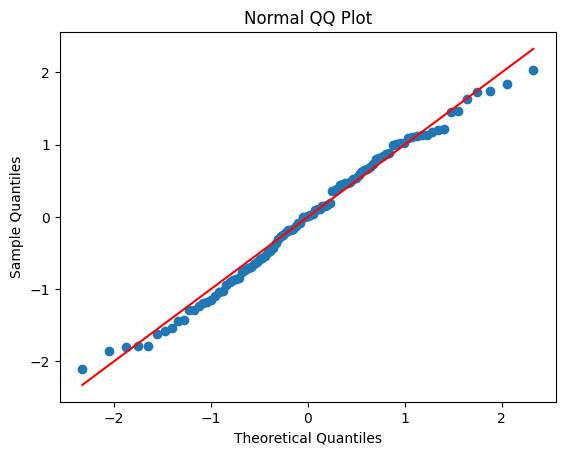

In [6]:
# Question 1.d
data = np.random.normal(loc=3, scale=5, size=100)
normal_qq_plot(data)

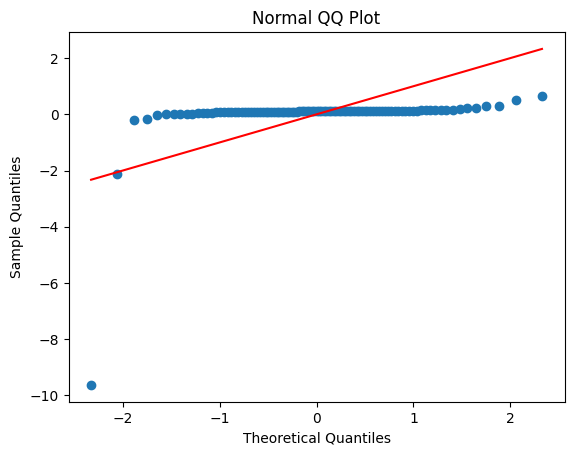

In [14]:
# Question 1.e
data = cauchy.rvs(loc=-2, scale=2, size=100)
normal_qq_plot(data)

In [ ]:
# Question 3
def linear_regression_least_squared(x: np.array, y:np.array):
  # least squared estimate of the slope
  slope = np.sum((x - np.mean(x))*y) / np.sum((x - np.mean(x)) ** 2)

  # least squared estimate of intercept
  intercept = np.mean(y) - slope * np.mean(x)
  print(slope, intercept)

  # predicted data
  predicted = intercept + np.multiply(x, slope)
  print(predicted)

  degrees_of_freedom = len(y) - 2

  # mean squared error of residuals
  residual = np.sum((y - predicted) ** 2) / degrees_of_freedom
  print(residual, degrees_of_freedom)

  ## pending - t statistic and p value of hypothesis testing


x = [1,2,3,4,5]
y = [6,7,8,9,10]
linear_regression_least_squared(x, y)